# ML4FG Final Report: Modeling Colorectal Cancer Gene Expression Distributions using Mixture Models

Authors: Shomik Ghose (sg3789@columbia.edu), Austin Tao (alt2177@columbia.edu)

In [ ]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Reading and Preprocessing

In [ ]:
#Importing dataset
df = pd.read_csv("drive/MyDrive/ML4FG Final Project/Bodmer_microarray_phenotype.csv",index_col=0)
df.head()

,C10,C106,C125PM,C32,C70,C75,C80,C84,C99,CACO2,...,SW403,SW48,SW480,SW837,SW948,T84,VACO10MS,VACO429,VACO4A,VACO5
DDR1,11.10390,11.07910,11.17970,11.50680,11.08760,11.33030,11.09560,11.21460,11.53890,10.14060,...,11.15560,11.43050,11.04630,11.10180,11.32870,10.85770,11.01680,11.20140,9.80261,9.81900
RFC2,9.45475,9.00771,9.86042,9.52498,9.53370,8.79881,7.31596,9.19284,7.42561,9.42345,...,9.39105,10.02960,10.24310,9.57473,9.67545,9.74446,9.24474,8.27504,9.62195,10.30300
HSPA6,6.33489,6.08624,5.99624,6.29194,5.76445,5.87747,5.89491,5.85956,5.78572,5.63281,...,5.97411,5.91963,5.75286,6.08853,5.73124,5.94438,5.90822,6.55251,6.08932,5.82700
PAX8,8.34283,8.80605,8.27972,8.97679,8.61314,8.24204,8.42736,8.63846,8.51370,8.27960,...,8.43641,8.69135,8.96714,8.78303,8.99510,8.36773,8.94381,8.31004,8.47219,8.28388
GUCA1A,3.77159,3.68338,3.91228,3.73648,3.64068,3.81183,3.76107,3.78736,3.89909,3.70464,...,3.68933,3.80050,3.94595,3.78618,3.74473,3.90953,4.00774,3.63841,4.01677,3.74778


In [ ]:
df.shape

(54702, 78)

The dataset contains 54,702 genes and 78 samples. The samples represent colorectal cancer cell lines.

Ex. The link to the C10 sample is here: https://www.cancertools.org/cell-lines/151755

In [ ]:
df.index.unique()

Index(['DDR1', 'RFC2', 'HSPA6', 'PAX8', 'GUCA1A', 'UBA7', 'THRA', 'PTPN21',
       'CCL5', 'CYP2E1',
       ...
       'KRAS all mutations', 'BRAF hotspot mutations', 'BRAF all mutations',
       'PIK3CA hotspot mutations', 'PIK3CA all mutations',
       'FBXW7 hotspot mutations', 'FBXW7 all mutations',
       'TGFBR2 hotspot mutations', 'TGFBR2 all mutations',
       'SMAD4 all mutations'],
      dtype='object', length=21077)

**Handling Duplicates**

In [ ]:
#There are 33625 duplicates
df.index.duplicated().sum()

33625

In [ ]:
#Relabeling duplicates
df.index = df.index + ("_"+df.groupby(level=0).cumcount().astype(str)).replace('_0','')
df.head()

,C10,C106,C125PM,C32,C70,C75,C80,C84,C99,CACO2,...,SW403,SW48,SW480,SW837,SW948,T84,VACO10MS,VACO429,VACO4A,VACO5
DDR1,11.10390,11.07910,11.17970,11.50680,11.08760,11.33030,11.09560,11.21460,11.53890,10.14060,...,11.15560,11.43050,11.04630,11.10180,11.32870,10.85770,11.01680,11.20140,9.80261,9.81900
RFC2,9.45475,9.00771,9.86042,9.52498,9.53370,8.79881,7.31596,9.19284,7.42561,9.42345,...,9.39105,10.02960,10.24310,9.57473,9.67545,9.74446,9.24474,8.27504,9.62195,10.30300
HSPA6,6.33489,6.08624,5.99624,6.29194,5.76445,5.87747,5.89491,5.85956,5.78572,5.63281,...,5.97411,5.91963,5.75286,6.08853,5.73124,5.94438,5.90822,6.55251,6.08932,5.82700
PAX8,8.34283,8.80605,8.27972,8.97679,8.61314,8.24204,8.42736,8.63846,8.51370,8.27960,...,8.43641,8.69135,8.96714,8.78303,8.99510,8.36773,8.94381,8.31004,8.47219,8.28388
GUCA1A,3.77159,3.68338,3.91228,3.73648,3.64068,3.81183,3.76107,3.78736,3.89909,3.70464,...,3.68933,3.80050,3.94595,3.78618,3.74473,3.90953,4.00774,3.63841,4.01677,3.74778


In [ ]:
#Removed all duplicates
df.index.duplicated().sum()

0

In [ ]:
#Example of relabelling post-duplicate-handling
#The second CDH1 instance has been relabelled to CDH1_1
df.loc[["CDH1","CDH1_1"],:]

,C10,C106,C125PM,C32,C70,C75,C80,C84,C99,CACO2,...,SW403,SW48,SW480,SW837,SW948,T84,VACO10MS,VACO429,VACO4A,VACO5
CDH1,8.84476,8.43063,9.05031,9.41713,8.56102,8.34133,10.6095,10.1148,10.9150,9.90415,...,8.50438,8.31705,6.00528,8.74518,8.50366,9.1853,9.56729,6.43262,8.70961,7.86674
CDH1_1,11.83090,13.22360,12.34470,11.83150,11.90950,12.01860,13.2421,12.7547,13.4284,12.83840,...,12.26220,11.80070,8.95743,11.76250,12.13570,12.6199,12.40240,10.14970,11.37710,11.09120


**Handling Null Values**

In [ ]:
df.isna()

,C10,C106,C125PM,C32,C70,C75,C80,C84,C99,CACO2,...,SW403,SW48,SW480,SW837,SW948,T84,VACO10MS,VACO429,VACO4A,VACO5
DDR1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
RFC2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
HSPA6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PAX8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
GUCA1A,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBXW7 hotspot mutations,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
FBXW7 all mutations,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
TGFBR2 hotspot mutations,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,True,True
TGFBR2 all mutations,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


We chose to keep nan values because if we turn nan values into 0, that will skew the distribution (since we want the nan value to be omitted from the analysis, not to beincluded as 0 since 0 has real meaning in this case).

# Gaussian Mixture Models

In [ ]:
#Isolating a row of the data to run the model on
temp = df.loc['CDH1',:].dropna()
temp

C10         8.84476
C106        8.43063
C125PM      9.05031
C32         9.41713
C70         8.56102
             ...   
T84         9.18530
VACO10MS    9.56729
VACO429     6.43262
VACO4A      8.70961
VACO5       7.86674
Name: CDH1, Length: 78, dtype: float64

In [ ]:
#Importing the existing GMM implementation from the sklearn.mixture package
from sklearn.mixture import GaussianMixture

#Reshaping the input array to make it two-dimensional
inp = np.array(temp).reshape(-1, 1)

In [ ]:
#Functions to determine our model selection/goodness of fit metrics

#Writing a function to identify which indices in a sorted list a number lies between
#Parameters are "lis" (a sorted list from least to greatest) and "num" (a number of the user's choosing)
#The function returns the index of the maximum number in the list that is less than "num"
def find_ind(num, lis):
  i = 0
  while num > lis[i+1]:
    i += 1
  return i

#Writing a function to identify the area under a curve using the rectangular area approximation
#Parameters are "xl" and "yl" (the x and y values of the curve)
def rec_area_under(xl,yl):
  aund = 0
  for i in range(len(xl)-1):
    aund += (yl[i]*(xl[i+1]-xl[i]))
  return aund

#Writing a function to calculate our "Adjusted Least Squares" (ALS) metric
#Parameters are "bins" (the y-values of the bins in the histogram) and "preds" (the y-values (likelihoods) of the curve fitted to the distribution) 
ind_test = []
def ls_metric(preds, bins):
  ls_ls = 0
  for i in range(len(x)):
    ind = find_ind(x[i],bins)
    ind_test.append(ind)
    ls_ls += (abs(counts[ind]-preds[i])**2)
  return ls_ls

#Writing a function to calculate our "Area Under Difference" (AUD) metric
#Parameters are "hx" and "hy" (the x and y values of the bins in the histogram) and "px" and "py" (the x and y values of the curve fitted to the distribution)
def ar_metric(hx,hy,px,py):
  hund = rec_area_under(hx,hy)
  pund = rec_area_under(px,py)
  return pund-hund

Gaussian Mixture Model BIC (1 Component) 299.3267181529215
Gaussian Mixture Model ALS (1 Component) 0.24728267380757915
Gaussian Mixture Model AUD (1 Component) 0.219123704860975


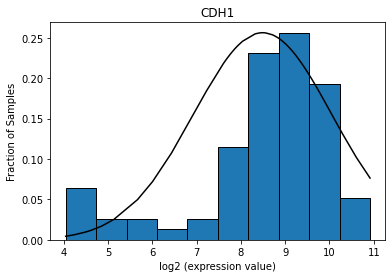

In [ ]:
#Fitting 1 component Gaussian Mixture Model

gmm1 = GaussianMixture(n_components = 1)
gmm1 = gmm1.fit(inp)
fig, ax = plt.subplots()
counts, bins, bars = ax.hist(temp,weights=np.ones(len(temp)) / len(temp),ec="black")  #the "weights" argument makes sure we graph the ratio rather than the count of frequencies on the y-axis
x= temp
y = np.exp(gmm1.score_samples(inp))
y = y*max(counts)/max(y)  #This line normalizes the y-values of the curve so we can compare the histogram and fitted curve on the same scale
x,y = zip(*sorted(zip(x,y),key=lambda x: x[0]))
ax.plot(x,y,"-k")
plt.title("CDH1")
plt.xlabel("log2 (expression value)")
plt.ylabel("Fraction of Samples")
print("Gaussian Mixture Model BIC (1 Component) " + str(gmm1.bic(inp)))
print("Gaussian Mixture Model ALS (1 Component) " + str(ls_metric(y,bins)))
print("Gaussian Mixture Model AUD (1 Component) " + str(ar_metric(bins,counts,x,y)))
plt.show()

Gaussian Mixture Model BIC (2 Components) 266.64189831018325
Gaussian Mixture Model ALS (2 Components) 0.06806613987032127
Gaussian Mixture Model AUD (2 Components) -0.099175189367681


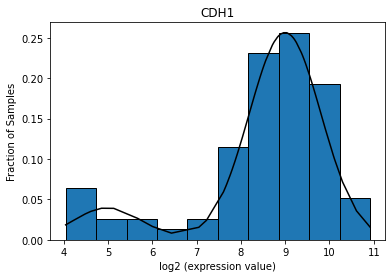

In [ ]:
#Fitting 2 component Gaussian Mixture Model

gmm2 = GaussianMixture(n_components = 2)
gmm2 = gmm2.fit(inp)
fig, ax = plt.subplots()
counts, bins, bars = ax.hist(temp,weights=np.ones(len(temp)) / len(temp),ec="black")
x= temp
y = np.exp(gmm2.score_samples(inp))
y = y*max(counts)/max(y)
x,y = zip(*sorted(zip(x,y),key=lambda x: x[0]))
ax.plot(x,y,"-k")
plt.title("CDH1")
plt.xlabel("log2 (expression value)")
plt.ylabel("Fraction of Samples")
print("Gaussian Mixture Model BIC (2 Components) " + str(gmm2.bic(inp)))
print("Gaussian Mixture Model ALS (2 Components) " + str(ls_metric(y,bins)))
print("Gaussian Mixture Model AUD (2 Components) " + str(ar_metric(bins,counts,x,y)))
plt.show()

# Student-t Mixture Models

In [ ]:
#Installing the smm package for student-t mixture models
!pip install smm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for smm: filename=smm-0.1.5-py3-none-any.whl size=13142 sha256=9af0c2080919ce44dbecdb472ce53a526c5137e24ff6fe65cc93bc1b8dd49e70
  Stored in directory: /root/.cache/pip/wheels/8c/80/e4/c43a3b65c48aaf8d9c9a4454472c12d758020bdada7c79fa97
Successfully built smm


In [ ]:
#Importing the smm package and setting a random seed for reproducibility
import smm
seed = 123
np.random.seed(seed)

Student-t Mixture Model BIC (1 Component) -27.9464304870602
Student-t Mixture Model ALS (1 Component) 1.6296742240355626
Student-t Mixture Model AUD (1 Component) -0.3636131036113492


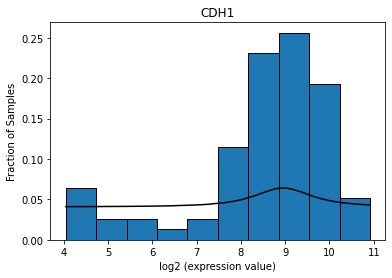

In [ ]:
#Fitting 1 component Student-t Mixture Model

tmm1 = smm.SMM(n_components=1, covariance_type='full', random_state=seed, tol=1e-6, 
    min_covar=1e-6, n_iter=1000, n_init=1, params='wmcd', init_params='wmcd')
tmm1.fit(inp)
fig, ax = plt.subplots()
counts, bins, bars = ax.hist(temp,weights=np.ones(len(temp)) / len(temp),ec="black") 
x= temp
y = np.exp(tmm1.score_samples(inp)[0])
y=y*max(counts)/max(y)*(counts[0]/max(counts)) #This line normalizes the y-values of the curve so we can compare the histogram and fitted curve on the same scale
x,y = zip(*sorted(zip(x,y),key=lambda x: x[0]))
ax.plot(x,y,"-k")
plt.title("CDH1")
plt.xlabel("log2 (expression value)")
plt.ylabel("Fraction of Samples")
print("Student-t Mixture Model BIC (1 Component) " + str(tmm1.bic(inp)))
print("Student-t Mixture Model ALS (1 Component) " + str(ls_metric(y,bins)))
print("Student-t Mixture Model AUD (1 Component) " + str(ar_metric(bins,counts,x,y)))
plt.show()

Student-t Mixture Model BIC (2 Components) -11.902826953216774
Student-t Mixture Model ALS (2 Components) 1.6039264240359572
Student-t Mixture Model AUD (2 Components) -0.3547809131346519


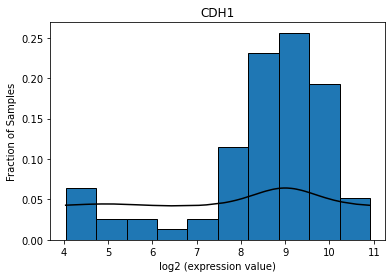

In [ ]:
#Fitting 2 component Student-t Mixture Model

tmm2 = smm.SMM(n_components=2, covariance_type='full', random_state=seed, tol=1e-6, 
    min_covar=1e-6, n_iter=1000, n_init=1, params='wmcd', init_params='wmcd')
tmm2.fit(inp)
fig, ax = plt.subplots()
counts, bins, bars = ax.hist(temp,weights=np.ones(len(temp)) / len(temp),ec="black")
x= temp
y = np.exp(tmm2.score_samples(inp)[0])
y=y*max(counts)/max(y)*(counts[0]/max(counts))
x,y = zip(*sorted(zip(x,y),key=lambda x: x[0]))
ax.plot(x,y,"-k")
plt.title("CDH1")
plt.xlabel("log2 (expression value)")
plt.ylabel("Fraction of Samples")
print("Student-t Mixture Model BIC (2 Components) " + str(tmm2.bic(inp)))
print("Student-t Mixture Model ALS (2 Components) " + str(ls_metric(y,bins)))
print("Student-t Mixture Model AUD (2 Components) " + str(ar_metric(bins,counts,x,y)))
plt.show()

Student-t Mixture Model BIC (3 Components) 5.0848815308331865
Student-t Mixture Model ALS (3 Components) 1.6057158129258977
Student-t Mixture Model AUD (3 Components) -0.3557288186269985


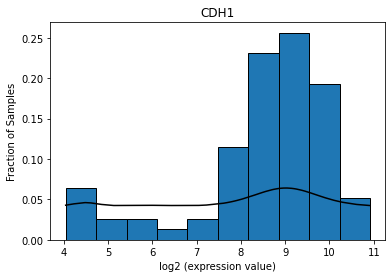

In [ ]:
#Fitting 3 component Student-t Mixture Model

tmm3 = smm.SMM(n_components=3, covariance_type='full', random_state=seed, tol=1e-6, 
    min_covar=1e-6, n_iter=1000, n_init=1, params='wmcd', init_params='wmcd')
tmm3.fit(inp)
fig, ax = plt.subplots()
counts, bins, bars = ax.hist(temp,weights=np.ones(len(temp)) / len(temp),ec="black")
x= temp
y = np.exp(tmm3.score_samples(inp)[0])
y=y*max(counts)/max(y)*(counts[0]/max(counts))
x,y = zip(*sorted(zip(x,y),key=lambda x: x[0]))
ax.plot(x,y,"-k")
plt.title("CDH1")
plt.xlabel("log2 (expression value)")
plt.ylabel("Fraction of Samples")
print("Student-t Mixture Model BIC (3 Components) " + str(tmm3.bic(inp)))
print("Student-t Mixture Model ALS (3 Components) " + str(ls_metric(y,bins)))
print("Student-t Mixture Model AUD (3 Components) " + str(ar_metric(bins,counts,x,y)))
plt.show()

# Weighted Average (of Gaussian and Student-t) Mixture Model

In [ ]:
#Analytic process to determine weights
counts, bins, bars = ax.hist(temp,weights=np.ones(len(temp)) / len(temp),ec="black")
x= temp
#Using 2 component Gaussian (as this was best Gaussian fit from above)
yg = np.exp(gmm2.score_samples(inp))
yg = yg*max(counts)/max(yg)
xg,yg = zip(*sorted(zip(x,yg),key=lambda x: x[0]))
#Using 3 component student-t (as this was best student-t fit from above)
yt = np.exp(tmm3.score_samples(inp)[0])
yt=yt*max(counts)/max(yt)*(counts[0]/max(counts))
x,yt = zip(*sorted(zip(x,yt),key=lambda x: x[0]))

In [ ]:
#Analytic process to determine weights

#1. Keep 2 “running scores” across the dataset, one for the Gaussian mixture and one for the student-t mixture.
#2. For each datapoint, calculate the ALS metric for each of the two fits. Choose min(ALS_Gaussian, ALS_t), and add that to the corresponding running score.
#3. Normalize the running scores so they sum to 1, and use them as weights.

#Initialize running scores
gw = 0 #Gaussian running score
tw = 0 #Student-t running score
for i in range(len(temp)):
  ind = find_ind(temp[i],bins)
  gls = (abs(counts[ind]-yg[i])**2)
  tls = (abs(counts[ind]-yt[i])**2)
  #Determining min of ALS metrics and adding to corresponding running score
  if gls <= tls:
    gw += gls
  else:
    tw += tls
#Normalizing runnning scores so they sum to 1
gwe = gw/(gw+tw)
twe = tw/(gw+tw)
#Inverting running scores so greater running score (which denotes worse fit) corresponds to lower weight and vice versa
gwe = 1-gwe
twe = 1-twe
print(gwe)
print(twe)

0.581588430698612
0.418411569301388


Weighted Average Mixture Model BIC: 114.52336338327052
Weighted Average Mixture Model ALS: 0.04101324888169494
Weighted Average Mixture Model AUD: 0.07346078013832269


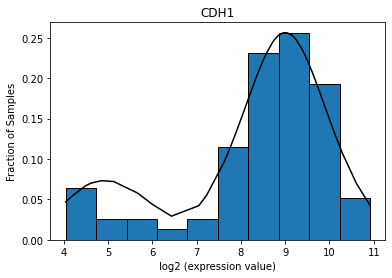

In [ ]:
#Fitting weighted average mixture model

fig, ax = plt.subplots()
counts, bins, bars = ax.hist(temp,weights=np.ones(len(temp)) / len(temp),ec="black")
x= temp
w1 = gwe
w2 = twe
y = np.exp(np.average([gmm2.score_samples(inp),tmm3.score_samples(inp)[0]],axis=0,weights=[w1,w2]))
y = y*(max(counts)/max(y))
x,y = zip(*sorted(zip(x,y),key=lambda x: x[0]))
ax.plot(x,y,"-k")
plt.title("CDH1")
plt.xlabel("log2 (expression value)")
plt.ylabel("Fraction of Samples")
print("Weighted Average Mixture Model BIC: " + str(w1*tmm3.bic(inp) + w2*gmm2.bic(inp)))
print("Weighted Average Mixture Model ALS: " + str(ls_metric(y,bins)))
print("Weighted Average Mixture Model AUD: " + str(ar_metric(bins,counts,x,y)))
plt.show()